# Houses to rent in Brazil
### Author: Danilo Pedrelli

## Table of Contents

1. [Statement of the problem](#problem)
1. [Description of the Data](#description)
1. [Importing Libraries](#lib)
1. [Importing Data](#data)
1. [Exploring Data](#explore)
    1. [Statistical Description](#stats)
    1. [Analysis of the outliers](#outliers)
    1. [Visualizing Data](#visualize)
1. [Drawing Conclusions](#conclusions)

<a id='problem'></a>

## Statement of the Problem

__Project Summary__: Home is a place where we stay after work, to relax, rest, have fun, and to feel safe, specially during the coronavirus outbreak. Therefore, choosing a house that can afford the best to us is extremely necessary. However, most of us have a limited budget to spend on renting, and knowing to evaluate the best options that fit in our pocket is really important.

In this project, we intend to give an overview of the best places to rent according to the dataset provided at:

https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent

__Practice Skills__:

- Python

- Exploratory Data Analysis

<a id='problem'></a>

## Description of the Data

The data dictionary is given by:

__city__ - city of the property;

__area__ - area of the house;

__rooms__ - number of the rooms in the house;

__bathroom__ -  number of bathrooms;

__parking spaces__ - number of parking spaces;

__floor__ - the number of the floor;

__animal__ - animal allowance: accept or not accept;

__furniture__ -  if it is furnished or not furnished;

__hoa__ - homeowners association tax;

__rent amount__ - amount of the rent.

<a id="lib"></a>

## Importing Libraries

The libraries we are going to use in this project are the following:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='data'></a>

## Importing Data

Our data will be imported as *htr*. The missing values are stated as '-', so they are replaced as np.nan.

In [2]:
htr = pd.read_csv('houses_to_rent_v2.csv',na_values='-')

<a id='explore'></a>

## Exploring Data

Information about the columns give:

In [3]:
htr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 10692 non-null  object 
 1   area                 10692 non-null  int64  
 2   rooms                10692 non-null  int64  
 3   bathroom             10692 non-null  int64  
 4   parking spaces       10692 non-null  int64  
 5   floor                8231 non-null   float64
 6   animal               10692 non-null  object 
 7   furniture            10692 non-null  object 
 8   hoa (R$)             10692 non-null  int64  
 9   rent amount (R$)     10692 non-null  int64  
 10  property tax (R$)    10692 non-null  int64  
 11  fire insurance (R$)  10692 non-null  int64  
 12  total (R$)           10692 non-null  int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 1.1+ MB


We see that the floor columns is the only one with less values than 10692. We will fill those missing values with 0.

In [4]:
htr.fillna(0,inplace=True)

In order to get a notion the data we use the sample method.

In [5]:
htr.sample(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
3641,São Paulo,73,2,2,1,13.0,acept,not furnished,700,1250,150,16,2116
9145,Porto Alegre,326,4,7,4,0.0,acept,not furnished,0,4200,184,64,4448
4915,Porto Alegre,40,1,1,1,0.0,acept,not furnished,0,960,15,18,993
1342,Porto Alegre,89,3,1,0,3.0,acept,not furnished,631,1100,85,17,1833
2259,Belo Horizonte,197,4,2,3,3.0,acept,not furnished,850,4250,400,57,5557
5738,São Paulo,370,4,5,5,17.0,acept,furnished,4800,5000,1992,64,11860
434,Porto Alegre,60,2,1,1,3.0,acept,not furnished,250,800,22,12,1084
4145,São Paulo,140,3,3,2,2.0,acept,not furnished,1300,2800,292,36,4428
3555,Rio de Janeiro,70,2,2,2,3.0,acept,not furnished,900,1700,265,22,2887
6223,São Paulo,321,3,5,2,0.0,acept,furnished,0,7318,1072,111,8501


<a id='stats'></a>

### Statistical Description

To visualize mean, standard deviation, maximum, minimum, etc, of the numerical columns, we can use the describe method. As an example, lets take the city of São Paulo:

### São Paulo

In [6]:
htr[htr.city=='São Paulo'].describe()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000
mean,158.899439,2.558859,2.467641,1.877527,5.626465,1169.627994,4652.793783,495.701716,62.428911,6380.831833
std,347.474169,1.166365,1.503060,1.687973,6.056361,4076.461180,3634.612007,4153.618928,50.073429,7541.320897
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,500.000000,0.000000,4.000000,508.000000
25%,59.000000,2.000000,1.000000,1.000000,0.000000,0.000000,2000.000000,37.000000,26.000000,2631.000000
50%,106.000000,3.000000,2.000000,1.000000,4.000000,665.000000,3400.000000,170.000000,45.000000,4596.000000
75%,212.000000,3.000000,4.000000,3.000000,9.000000,1608.500000,6000.000000,550.000000,83.000000,8591.000000
max,24606.000000,10.000000,10.000000,12.000000,46.000000,220000.000000,45000.000000,313700.000000,677.000000,316900.000000


- __area:__ here we observe that the average area is around 160 m². This is a bit high, as can be seen if we compare to the minimum. Such differece is clealy exeplified by the high standard deviation of 347 m².
- __rooms:__ The mean number of rooms is quite normal, as we can see from the difference between the minimum (1 room), and the maximum (10 rooms)
- __bathroom:__ Bathroom minimum and maximum are the same of the numer of rooms, however, their mean differs slighly, showing that, on average, places have more rooms than bathrooms.
- __parking spaces:__ Parking places are quite unusual, since the mean is lower than 2, but the maximum is even higher than the number of rooms. This seems have direct correlation with the price of places, which will be investigated later.
- __floor:__ The floor mean number is around 5, whith the miminum zero, which mean houses, and therefore, are a good comparison for checking which places are most expensive, houses or apartments.
- __hoa:__ The homeworkers association tax is something that can have a big impact on the total rental price. We see that some places have no such tax, whereas the maximum is R\\$ 220.000,00, which seems to be an outlier.
- __rent amount:__ The minimum rent amount is R\\$ 500,00 and the average is R\\$ 4.652,00. The maximum price is changing too much the average, taking the 75\% as the maximmum may be a good approach for proper evaluation.
- __property tax:__ The property tax is also not always present, and can also contribute expressively to the total price.
- __fire insurance:__ Interestingly, the fire insurance is present in all places, and ranges from R\\$ 4,00 to R\\$ 600,00. This can also show a correlation between expensive and cheap places.
- __total:__ The total will consider all the previous features, let's check which of them affect most it.

As mentioned above, we can observe the high possibility of having outliers. Therefore, next section is devoted to removing it.

<a id='outliers'></a>

### Analysis of the outliers

In order to investigate the existence of  outliers in Belo Horizonte, we will compute the box plots for each feature. After a few tests, the best condition we found to put on the data, such that its characteristics won't change much, is to assum the total lower than R\\$ 10.000,00 and the area lower than 600 m².

In [7]:
htr_cond = htr[(htr['total (R$)']<10000) & (htr['area']<600)].copy()

The boxplots give:

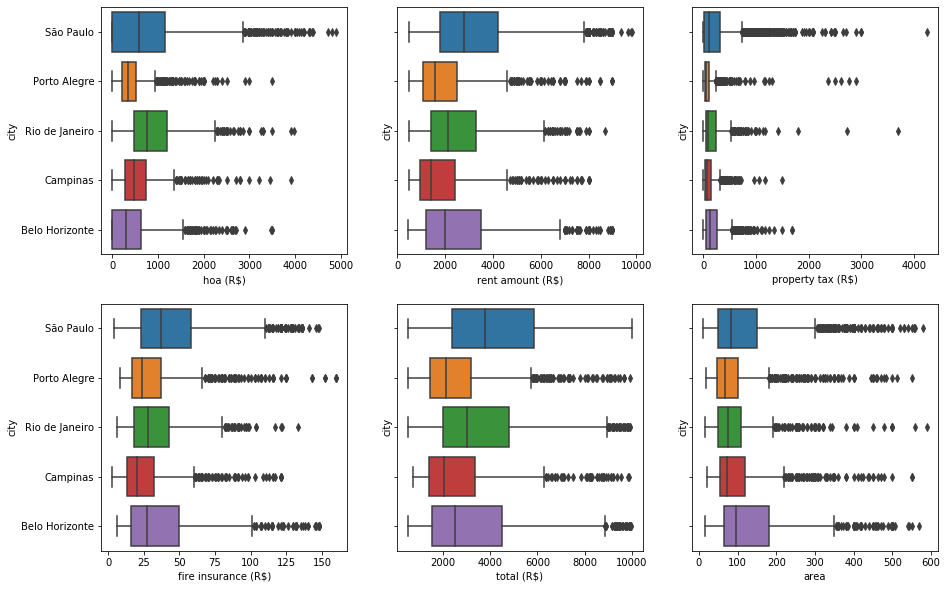

In [8]:
fig, (ax0, ax1) = plt.subplots(nrows = 2, ncols=3, sharey = True, figsize = (15,10))
sns.boxplot(x='hoa (R$)',y='city',data=htr_cond,ax=ax0[0])
sns.boxplot(x='rent amount (R$)',y='city',data=htr_cond,ax=ax0[1])
sns.boxplot(x='property tax (R$)',y='city',data=htr_cond,ax=ax0[2])
sns.boxplot(x='fire insurance (R$)',y='city',data=htr_cond,ax=ax1[0])
sns.boxplot(x='total (R$)',y='city',data=htr_cond,ax=ax1[1])
sns.boxplot(x='area',y='city',data=htr_cond,ax=ax1[2])

<a id='visualize'></a>

## Visualizing Data

Now, we need to understand the data for each city. Therefore, in what follows we plot the hoa, rent amount, property tax, fire insurance, total and area for the cities of São Paulo, Porto Alegre, Rio de Janeiro, Campinas and Belo Horizonte.

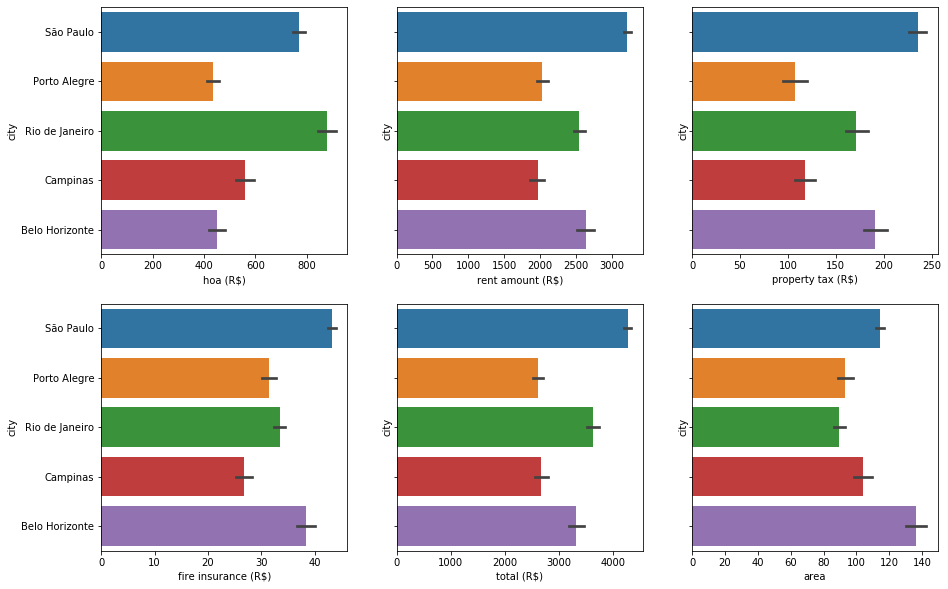

In [9]:
fig, (ax0, ax1) = plt.subplots(nrows = 2, ncols=3, sharey = True, figsize = (15,10))
sns.barplot(x='hoa (R$)',y='city',data=htr_cond,ax=ax0[0])
sns.barplot(x='rent amount (R$)',y='city',data=htr_cond,ax=ax0[1])
sns.barplot(x='property tax (R$)',y='city',data=htr_cond,ax=ax0[2])
sns.barplot(x='fire insurance (R$)',y='city',data=htr_cond,ax=ax1[0])
sns.barplot(x='total (R$)',y='city',data=htr_cond,ax=ax1[1])
sns.barplot(x='area',y='city',data=htr_cond,ax=ax1[2])

Lets analyze each city individualy:

### São Paulo

- __hoa:__ The homeworkers association tax is the second higher on average, but it is close to Rio de Janeiro.

- __rent amount:__ The rent amount is the highest in São Paulo, what is expected, given the high population of São Paulo.

- __property tax:__ Property tax is very high too.

- __fire insurance:__ Fire insurance is the highest in São Paulo too. Curiously, comparing it to the rent amount, we observe that the panels are quite similar, suggesting that the fire amount is probably a percentage of the rent amount.

- __total:__ The total in Sâo Paulo is the highest, which is in agreement with the previous features.

- __area:__ The area of the apartments in São Paulo is the second higher, but since the total is also high in São Paulo, we would better understand this feature if we could compute the m² price.

### Porto Alegre

- __hoa:__ In Porto Alegre, the hoa is the lowest one, but comparable to Belo Horizonte.

- __rent amount:__ The rent amount is only greater than in Campinas.

- __property tax:__ The property tax has also a low price compared to the other cities.

- __fire insurance:__ The fire insurance follows a pattern similar to the  rent amount, as mentioned.

- __total:__ The total is also in agreement with the previous features. Putting Porto Alegre with the cheaps places to rent.

- __area:__ Although the prices to rent a house in Porto Alegre are the lowest ones, the area is not the lowest, showing that the price of each m² may not be that low.

### Rio de Janeiro

- __hoa:__ Rio de Janeiro has the highest hoa. Which is a indicative that living there must be expensive.

- __rent amount:__ Rio de Janeiro has the third highest rent amount,but it is very close to Belo Horizonte, the second.

- __property tax:__ Third most expensive.

- __fire insurance:__ Third most expensive.

- __total:__ Second most expensive. Which is propably related to the tourism there.

- __area:__ The average area of houses in Rio de Janeiro is the smallest one, showing that the m² there must be the highest.

### Campinas

- __hoa:__ Campinas has the third highest hoa compared to the others.

- __rent amount:__ The rent amount is quite equivalent to Porto Alegre, which could be related to the size of the cities.

- __property tax:__ Here we see that the property tax in Campinas is not that high too.

- __fire insurance:__ Fire insurance is correspondent to the rent amount, as mentioned before.

- __total:__ In the toal, Campinas stays in the third place, but very close to Porto Alegre.

- __area:__ The area of the houses in Campinas is the third highest, showing that the m² there is probably cheaper.

### Belo Horizonte

- __hoa:__ The hoa in Belo Horizonte is quite close almost equal to Porto Alegre.

- __rent amount:__ The rent amount in Belo Horizonte is the second highest, but very close to Rio de Janeiro.

- __property tax:__ The property tax there is the second highest.

- __fire insurance:__ Fire insurance is the second highest.

- __total:__ Except for the hoa, Belo Horizonte has the second highest price in all the previous features, however, inthe total, Belo Horizonte is the third highest place. Ths, the hoa had a huge impact.

- __area:__ The area of the houses there are the highest ones.

## Feature Engineering - m² price column

As mentioned, the price of each m² is an important value to take a decision when renting a house. We do it by dividing each element of the total column by each one of the area column.

In [14]:
for lab, row in htr_cond.iterrows():
    htr_cond.loc[lab,'m² price (R$)']=htr_cond.loc[lab,'total (R$)']/htr_cond.loc[lab,'area']

In [15]:
htr_cond.sample(5)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),m² price (R$)
5448,São Paulo,40,1,1,1,4.0,acept,furnished,915,5000,115,36,6066,151.650000
9276,São Paulo,34,1,1,1,4.0,acept,not furnished,550,3800,109,49,4508,132.588235
1176,São Paulo,130,3,2,1,2.0,not acept,not furnished,1100,4500,384,58,6042,46.476923
6500,São Paulo,40,1,1,0,0.0,not acept,not furnished,30,780,17,12,839,20.975000
5211,São Paulo,114,1,1,1,6.0,acept,not furnished,987,2800,208,36,4031,35.359649


Next, we plot the m² price average for each city.

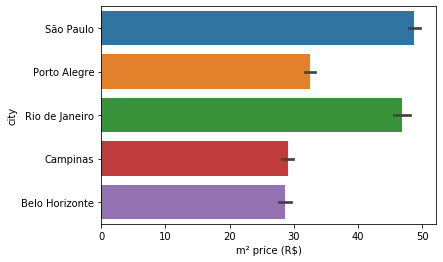

In [16]:
sns.barplot(x='m² price (R$)',y='city',data=htr_cond)

From this panel, we observe that the m² price ranking is:

- 1º São Paulo
- 2º Rio de Janeiro
- 3º Porto Alegre
- 4º Campinas
- 5º Belo Horizonte

This is quite interesting, because if we take Belo Horizonte, for example, the total price to rent a house there was third most expensive, however, due to the high area of the places, the m² price went down compared to the other cities.

### Preferences

Once we have analyzed the price features and area, lets investigate the other ones, namely:

*Numerical*

- rooms
- bathroom
- parking spaces
- floor

*Categorical*

- animal
- furniture

### Numerical

In what follows, we plot the numerical features of the house:

[(0, 35)]

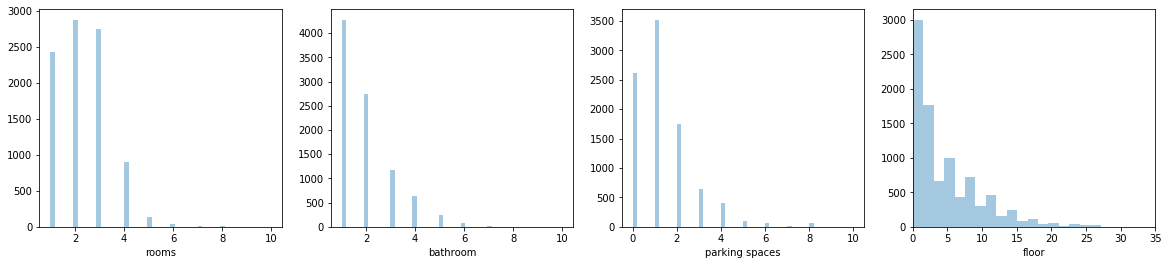

In [47]:
fig, ax = plt.subplots(nrows = 1, ncols=4, figsize = (20,4))
sns.distplot(htr_cond['rooms'],kde=False,ax=ax[0])
sns.distplot(htr_cond['bathroom'],kde=False,ax=ax[1])
sns.distplot(htr_cond['parking spaces'],kde=False,ax=ax[2])
sns.distplot(htr_cond['floor'],kde=False,ax=ax[3],bins=200)
ax[3].set(xlim=(0,35))

As we can see, most houses have less than 4 rooms, with a high numer of houses with just 1 room. The numer of bathrooms is usually lower than 4 too. Parking places is usually 1, but the second most frequent cases are houses with no parking places. Considering the floor, we see that most houses are in less than 15 floors, and the dataset has a many houses which are not apartments, since their floor is 0.

In summary, we observe that having a house with 2 rooms, 1 bathroom, 1 parking space and on the floor 0 is the most common case.

### Categorical

The categorical features: animal and furniture, are important for many people. People love their animals, and places that not accept them will be removed right away from the list.

On the other hand, considering the furniture, many people are moving to another city but are not sure whether or not they will stay longer in the city, students for example. For those people, a furnished place is fundamental.

Lets see a few plots.

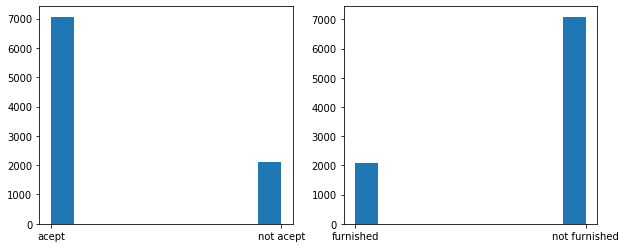

In [62]:
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize = (10,4))
ax[0].hist(htr_cond['animal'])
ax[1].hist(htr_cond['furniture'])
plt.show()

As we can see, most places accept animals, so this seem not to be an issue. However, most places are not furnished, and it might be quite difficult to find a place furnished for a good price.

<a id='conclusions'></a>

## Drawing Conclusions

In the present project, we were able to analyze the many features that are relevant for peoplle in the moment they want to rent a house. In the process, we analyzed the statistical description of the features in São Paulo. We saw that the high standard deviation for many features was a indicator of the presence of outliers in our data. Them, we chose the subset of the data which could best represent each city. Then, we analyzed each price feature for each city, comparing them and giving a good picture of the following prices: hoa (homeowners association tax), rent amount, property taz, fire insurance, total price. Also, we compared those values with the area of the houses. However, a new feature was necessary to be created in order to better visualizes and comprehend the data: the m² price. This feature enabled us to undertand which cities had the most higher prices of each m², showing that Belo Horionte, for instance, has the cheapest m² price among all the cities.

Later on, we investigated the remaining feature, spliting it into numerical (rooms, bathroom, parking spaces and floor) and categorical (animal and furniture). Within those features we were able to veify which is the most commen kind of house: 2 rooms, 1 bathroom, 1 parking space and on the floor 0, accepts animals, and not furnished.

We hope that this project could hel anyone looking to rent a house in those cities, or companies trying to better nderstand the market there.